## My Real Estate - price predictor 


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('Boston.csv')

In [3]:
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          501 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
housing['crim'].value_counts()

crim
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64

In [6]:
housing.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.285014,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.704801,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# for plotting histogram
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))
# plt.show()

## Train-Test Spliting

In [8]:

# import numpy as np

# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size=int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]
# In this model there is a problem .here test set generates randomly .
#For this reason model can be overfitted
# train_set,test_set = split_train_test(housing, 0.2)
# print(f"Rows in train set: {len(train_set)}\nRows is test set: {len(test_set)}\n ")

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows is test set: {len(test_set)}\n ")

Rows in train set: 404
Rows is test set: 102
 


In [10]:
# Stratified sampling for equal distribution
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing, housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
   

In [11]:
strat_test_set

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
342,343,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,380,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,224,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,220,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,49,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,467,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,53,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,122,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [12]:
# strat_test_set
# strat_test_set.info()
# strat_test_set.describe()
strat_test_set['chas'].value_counts()

chas
0    95
1     7
Name: count, dtype: int64

In [13]:
strat_train_set

# strat_trian_set.info()
# strat_trian_set.describe()
strat_train_set['chas'].value_counts()
#this 'chas' attribute is very much important for our regression to predict the right price
# I have to put this attribute in the model with equal distribution in training and testing dataset

chas
0    376
1     28
Name: count, dtype: int64

In [14]:
#95/7

In [15]:
#376/28


In [16]:
housing = strat_train_set.copy()

## Looking for correlations

In [17]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)
# + means strongly positive correlations
# - means strongly negative correlations

medv          1.000000
rm            0.679520
black         0.361761
zn            0.339741
dis           0.240451
chas          0.205066
Unnamed: 0   -0.223041
age          -0.364596
rad          -0.374693
crim         -0.393715
nox          -0.422873
tax          -0.456657
indus        -0.473516
ptratio      -0.493534
lstat        -0.740494
Name: medv, dtype: float64

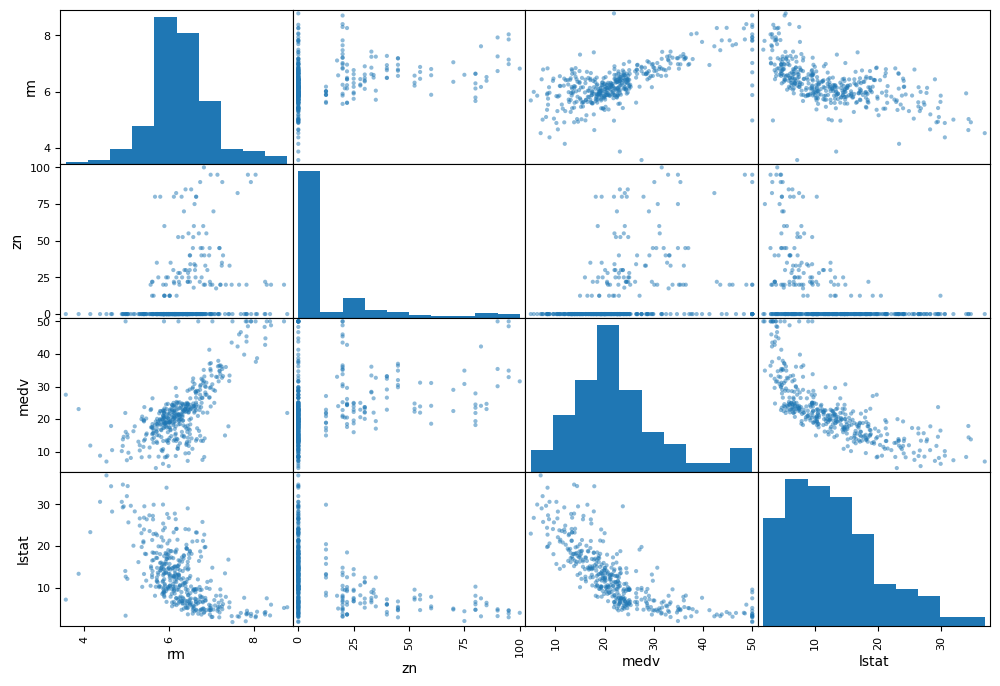

In [18]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["rm", "zn", "medv", "lstat"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()


<Axes: xlabel='rm', ylabel='medv'>

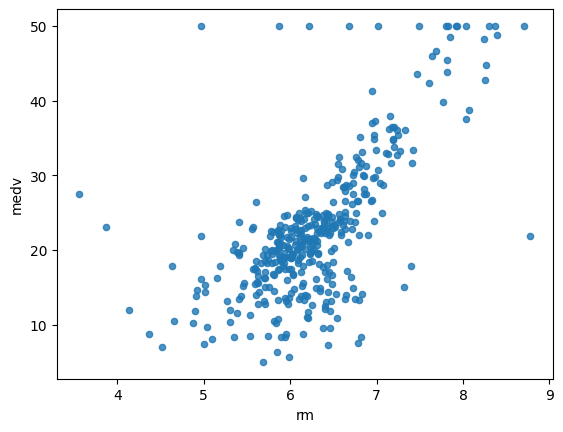

In [19]:
housing.plot(kind="scatter",x="rm",y="medv",alpha=0.8)
# Scatter plots are used to visualize the relationship between two numerical variables.
# They help in understanding the patterns, trends, and the presence of any outliers
# or clusters in the data.

# Correlation matrices, on the other hand, provide a comprehensive view of the pairwise 
# relationships between multiple variables

## Trying out attribute combination

In [20]:
housing['TAXRM'] = housing["tax"]/ housing["rm"]

In [21]:
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,TAXRM
254,255,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,349,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,477,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,322,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,327,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv          1.000000
rm            0.679520
black         0.361761
zn            0.339741
dis           0.240451
chas          0.205066
Unnamed: 0   -0.223041
age          -0.364596
rad          -0.374693
crim         -0.393715
nox          -0.422873
tax          -0.456657
indus        -0.473516
ptratio      -0.493534
TAXRM        -0.528774
lstat        -0.740494
Name: medv, dtype: float64

In [23]:
housing = strat_train_set.drop("medv", axis=1)
housing_labels = strat_train_set["medv"].copy()

## Missing attributes

In [24]:
# To take care of missing attributes, you have three options:
#     1.Get rid of missing data points
#     2.Get rid of the whole attribute
#     3.Set the value to some value(0, mean or median)

In [25]:
a = housing.dropna(subset=["rm"])  #option 1
a.shape

(400, 14)

In [26]:
housing.drop("rm", axis=1).shape  #option 2
# note that there is no rm column and also note that the original housing dataframe will remain unchanged

(404, 13)

In [27]:
median = housing["rm"].median() #compute median for option 3

In [28]:
print(median)

6.21


In [29]:
housing["rm"].fillna(median).head()  #option 3
#note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
Name: rm, dtype: float64

In [30]:
housing.shape
housing.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,251.551980,3.602814,10.836634,11.344950,0.069307,0.558064,6.279215,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,146.997898,8.099383,22.150636,6.877817,0.254290,0.116875,0.715265,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,124.750000,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,249.500000,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,382.250000,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,505.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
X = imputer.transform(housing)

#print(df_imputed)
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,251.551980,3.602814,10.836634,11.344950,0.069307,0.558064,6.278530,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,146.997898,8.099383,22.150636,6.877817,0.254290,0.116875,0.711739,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,124.750000,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,249.500000,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,382.250000,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,505.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a pipeline


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Create a pipeline
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('std_scaler', StandardScaler())  # Preprocessing step: StandardScaler
])




In [34]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 14)

## Selecting a desired for My Real Estates

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [36]:
some_data = housing.iloc[:5]
  

In [37]:
some_labels = housing_labels.iloc[:5]  

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)
#prepared_data

array([22.249, 25.117, 16.519, 23.377, 23.333])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

## Using better evaluation technique -- Cross Validation


In [41]:
# 1 2 3 4 5 6 7 8 9 10
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [42]:
rmse_scores

array([2.90190156, 2.92259396, 4.48632194, 2.41331861, 3.25429016,
       2.69591994, 4.72377063, 3.38626885, 3.02484548, 3.27427813])

In [43]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation : ", scores.std())
    
print_scores(rmse_scores)

Scores:  [2.90190156 2.92259396 4.48632194 2.41331861 3.25429016 2.69591994
 4.72377063 3.38626885 3.02484548 3.27427813]
Mean:  3.308350926229302
Standard deviation :  0.7051044464773342


## Quiz convert this notebook into python file and run the pipeline using vs code

## Saving the model

In [44]:
import joblib
joblib.dump(model, 'random_forest_model.joblib')



['random_forest_model.joblib']

## TESTING THE model on test data

In [45]:
from sklearn.metrics import mean_squared_error
X_test = strat_test_set.drop("medv",axis=1)
y_test = strat_test_set["medv"].copy()

X_test_prepard= my_pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepard)
final_mse = mean_squared_error(y_test,final_predictions )
final_rmse=np.sqrt(final_mse)


In [46]:
final_rmse

2.8737084720536523

In [47]:
#print(final_predictions, list(y_test))

In [50]:
# We are prining this for usage purpose
prepared_data[0]

array([ 0.02348534, -0.43942006,  3.12628155, -1.12165014, -0.27288841,
       -1.42262747, -0.23989282, -1.31238772,  2.61111401, -1.0016859 ,
       -0.5778192 , -0.97491834,  0.41164221, -0.86091034])